In [2]:
print("3.Classification.ipynb")
import numpy as np
import pandas as pd
import sklearn

print(sklearn.__version__)

3.Classification.ipynb
1.0.2


# 1. 분류 평가(Classfication Evaluation)

--------------
## 1-1. 분류 평가 지표
   - 혼동행렬(confusion matrix)
    - 모델의 성능을 평가할 때 사용되는 지표
    - 예측값이 실제 관측값을 얼마나 정확히 예측했는지 보여주는 행렬   
    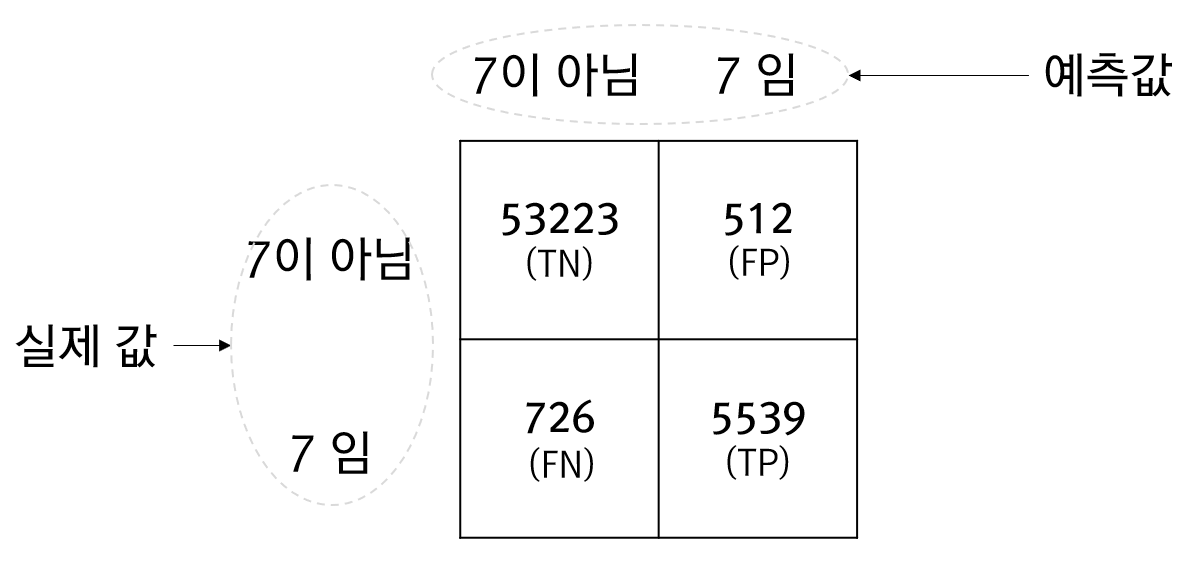
   - 혼동행렬을 이용한 평가지표
     - TP, TN, FP, FN, 정확도(Accuracy), 오분류율(Error Rate), 민감도(Sensitivity, (== Recall(재현율))), 특이도(Specificity), FR rate, 정밀도(Precision), F1 score, Fβ score, 카파 통꼐량
   - ROC curve
     - ROC curve: 수신자 판단 곡선, 위양성률(FPR, fall-out)과 재현율(recall, TPR)의 변화 시각화
     - AUC(Area Under the curve): ROC 곡선 아래 영역
  - Cohen's Kappa 통계량 

In [ ]:
# 분류 평가를 위한 분류 데이터셋 + 모델 학습/예측

from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

digits = load_digits()

y = (digits.target == 7).astype(int)
X_train, X_test, y_train, y_test = train_test_split(digits.data, y, random_state = 11)

LR = LogisticRegression(max_iter = 500)

LR.fit(X_train, y_train)
pred = LR.predict(X_test)


In [ ]:
# confusion matrix , 혼동행렬
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, pred) # 예측에 대한 혼동행렬 출력
#####
# [TN(True Negative(실제: 거짓, 예측: 거짓)),FP(False Positive(실제: 거짓, 예측: 참))]
# [FN(False Negative(실제: 참, 예측: 거짓)),TP(True Positive(실제: 참, 예측: 참))]
#####

array([[400,   5],
       [  2,  43]])

In [ ]:
# accuracy(정확도), Error rate(오분류율)
from sklearn.metrics import accuracy_score
print("Accuracy:",accuracy_score(y_test, pred)) # 정확도: (TP + TN) /  (TP + FN + FP + TN)
print("Error Rate:",1-accuracy_score(y_test, pred)) # 오분류율: (FP + FN) / (TP + FN + FP + TN)

## 라벨링이 불균형한 데이터셋의 경우에는 정확도만으로는 분류모델의 유의미한 성능 지표를 얻을 수 없다
## (ex. 99%가 참이고, 1%가 거짓인 데이터셋, 그냥 참이라고 예측하면 정확도 99%)

Accuracy: 0.9844444444444445
Error Rate: 0.015555555555555545


In [ ]:

# Recall(재현율 == Sensitivity(민감도)), Precision(정밀도)
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score

print("Recall == Sensitivity:", recall_score(y_test,pred)) 
# 재현율, 민감도: 실제로 Positive인 범주 중에서 Positive로 올바르게 예측한 비율, TP / (TP + FN)
print("Precision:", precision_score(y_test, pred))
# 정밀도: Positive로 예측한 범줌 중에서 실제 Positive인 비율, TP / (TP + FP)

### 재현율 (recall)
## 재현율이 중요 지표인 경우, 실제 Positive 데이터를 Negative로 잘못 판단하면 안되는 경우
## ex. 암 판단 모델

### 정밀도 (Precision)
## 정밀도가 중요 지표인 경우, 실제 Negative 데이터를 Positive로 잘못 판단하면 안되는 경우
## ex. 스팸메일 분류 모델

Recall == Sensitivity: 0.9555555555555556
Precision: 0.8958333333333334


In [ ]:
### 재현율 / 정밀도 트레이드오프
## 분류의 결정 임곗값(Threshold)을 조정하여 정밀도 또는 재현율의 수치를 높일 수 있지만
## 서로가 상호 보완적인 지표이기 때문에 한쪽을 높이면 한쪽은 떨어진다.

print('실제 class 값', y_test[75:80])
print()

pred_proba = LR.predict_proba(X_test)
pred = LR.predict(X_test)

print('두개의 class 중에서 더 큰 확률을 클래스 값으로 예측 \n', pred_proba[75:80])
print('threshold가 0.5일 때, 예측한 class 값:', pred[75:80])
print('혼동행렬')
print(confusion_matrix(y_test, pred))
print()

from sklearn.preprocessing import Binarizer
binarizer = Binarizer(threshold = 0.99) # positive일 확률이 99% 이상이어야만 positive로 인정해주겠다
threshold_pred = binarizer.fit_transform(pred_proba[:,1].reshape(-1,1))
print("threshold가 0.99일때, 예측한 class 값: ", threshold_pred[75:80].reshape(1,-1)) 
print("Recall == Sensitivity:", recall_score(y_test,threshold_pred)) # threshold 값이 커졌으므로, recall이 낮아진다
print("Precision:", precision_score(y_test, threshold_pred)) # threshold 값이 커졌으므로, precision이 높아진다
print(confusion_matrix(y_test, threshold_pred))
print()

실제 class 값 [0 0 1 1 0]

두개의 class 중에서 더 큰 확률을 클래스 값으로 예측 
 [[9.99999997e-01 3.18517118e-09]
 [9.99999998e-01 1.93610001e-09]
 [1.90528323e-05 9.99980947e-01]
 [2.76216292e-02 9.72378371e-01]
 [9.99995802e-01 4.19814337e-06]]
threshold가 0.5일 때, 예측한 class 값: [0 0 1 1 0]
혼동행렬
[[400   5]
 [  2  43]]

threshold가 0.99일때, 예측한 class 값:  [[0. 0. 1. 0. 0.]]
Recall == Sensitivity: 0.8888888888888888
Precision: 1.0
[[405   0]
 [  5  40]]



In [ ]:
# precision_recall_curve, 임계값에 따른 precision recall score
from sklearn.metrics import precision_recall_curve
precisions, recalls, thresholds = precision_recall_curve(y_test,pred_proba[:,1].reshape(-1,1))
# 임계값에 따른 precision recall score 추출

print('반환된 분류 결정 임곗값 배열의 shape: ', thresholds.shape)

thr_index = np.arange(0, thresholds.shape[0],7)
df  = pd.DataFrame([np.round(thresholds[thr_index],2),np.round(precisions[thr_index],3),np.round(recalls[thr_index],3)], index = ['thresholds', 'precisions','recalls'])
df

반환된 분류 결정 임곗값 배열의 shape:  (76,)


,0,1,2,3,4,5,6,7,8,9,10
thresholds,0.000,0.000,0.000,0.020,0.600,0.980,1.000,1.0,1.000,1.000,1.000
precisions,0.592,0.638,0.710,0.782,0.896,1.000,1.000,1.0,1.000,1.000,1.000
recalls,1.000,0.978,0.978,0.956,0.956,0.911,0.756,0.6,0.444,0.289,0.133


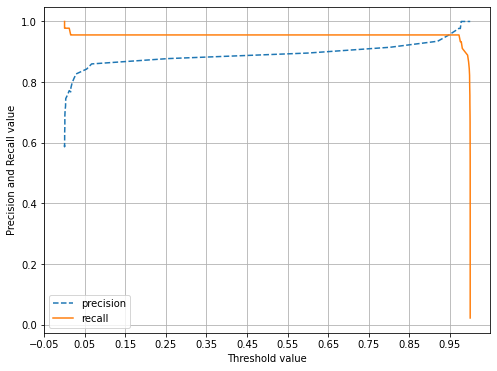

In [ ]:
# precision_recall_curve 그리기

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
%matplotlib inline

def precision_recall_curve_plot(y_test, pred_proba_c1):
  precisions, recalls, thresholds = precision_recall_curve(y_test,pred_proba_c1)

  plt.figure(figsize = (8,6))
  threshold_boundary = thresholds.shape[0]
  plt.plot(thresholds, precisions[0:threshold_boundary], linestyle = '--', label = 'precision')
  plt.plot(thresholds, recalls[0:threshold_boundary], label = 'recall')
  

  start,end = plt.xlim() # x축의 한계값 
  plt.xticks(np.round(np.arange(start,end,0.1),2)) # 눈금표시

  plt.xlabel('Threshold value'); plt.ylabel('Precision and Recall value')
  plt.legend(); plt.grid()
  plt.show()

precision_recall_curve_plot(y_test, pred_proba[:,1].reshape(-1,1))

In [ ]:
### 정밀도와 재현율의 맹점
## 정밀도 = 예측이 postive인 범주 안에서 실제 positive의 비율 TP/(TP + FP)
## 재현율 = 실제 positive인 범주 안에서 예측이 positive인 비율 TP/(TP + FN)

## if threshold가 1에 가까운 수:
##   예측을 보수적으로 하게되어, 예측이 틀릴 확률이 현저히 줄어든다. -> precision_score = 1
## if threshold가 0에 가까운 수:
##   모든 사례를 positive로 예측하면, 실제 positive인 값들은 모두 positive로 예측된다 -> recall_score = 1
## 정밀도와 재현율이 적절히 조화되어서 종합적인 성능평가에 기여하여야한다. => F1 score

In [ ]:
# F1 score, F1 = 2 * (precision * recall) / (precision + recall), precision과 recall의 조화평균
from sklearn.metrics import f1_score

print('f1 score: ', f1_score(y_test,pred))


f1 score:  0.924731182795699


In [ ]:
# F-beta score, F-beta = (1+beta^2) * (precision * recall) / (beta^2 * precision + recall), recall에 beta만큼의 가중치를 준 F1 score
from sklearn.metrics import fbeta_score
print("Recall == Sensitivity:", recall_score(y_test,pred)) 
print("Precision:", precision_score(y_test, pred))
print('f1 score: ', f1_score(y_test,pred))
print('f2 score: ', fbeta_score(y_test,pred,beta = 2)) # recall에 2배 가중치, recall 값에 더 가까워진다
print('f0.5 score: ', fbeta_score(y_test,pred,beta = 0.5))# recall에 0.5배 가중치, precision 값에 더 가까워진다

Recall == Sensitivity: 0.9555555555555556
Precision: 0.8958333333333334
f1 score:  0.924731182795699
f2 score:  0.9429824561403511
f0.5 score:  0.9071729957805909


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,pred))

## classification_report & macro avg, weighted avg
#  https://towardsdatascience.com/micro-macro-weighted-averages-of-f1-score-clearly-explained-b603420b292f

              precision    recall  f1-score   support

           0       1.00      0.99      0.99       405
           1       0.90      0.96      0.92        45

    accuracy                           0.98       450
   macro avg       0.95      0.97      0.96       450
weighted avg       0.99      0.98      0.98       450



In [ ]:
# FP rate, 실제로 Negative인 범주 중에서 Positive로 잘못 예측한 비율,FPR(거짓 긍정률) ,FP / (FP + TN)
# TP rate, 실제로 Positive인 범주 중에서 Positive로 예측한 비율, TPR(참 긍정률), TP / (FN + TP) == recall, sensitivity
# ROC curve(Receiver Operation Characteristic Curve, 수신자 판단 곡선), FPR을 x축으로, TPR을 y축으로한다
# AUC 값이 0.5이면 분류 능력이 없음, 1에 가까워질수록 분류 능력 좋음

from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, pred_proba[:,1].reshape(-1,1)) # thresholds를 조정하면서 roc_curve 생성

pd.DataFrame([thresholds.round(4),fpr.round(4),tpr.round(4)], index = ['thresholds','fpr','tpr'])

,0,1,2,3,4,5,6,7,8,9
thresholds,2.0,1.0000,0.9779,0.9757,0.9724,0.0156,0.0120,0.0005,0.0005,0.0
fpr,0.0,0.0000,0.0000,0.0025,0.0025,0.0321,0.0321,0.0765,0.0765,1.0
tpr,0.0,0.0222,0.9333,0.9333,0.9556,0.9556,0.9778,0.9778,1.0000,1.0


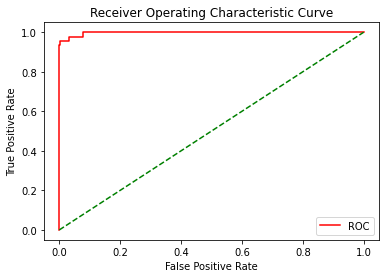

In [ ]:
# roc curve 그리기
plt.plot(fpr, tpr, color='red', label='ROC')
plt.plot([0, 1], [0, 1], color='green', linestyle='--') # 기준이 되는 랜덤 분류기 auc = 0.5
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curve')
plt.legend()
plt.show()

In [ ]:
# roc_auc_score
from sklearn.metrics import roc_auc_score

print('AUC: ', roc_auc_score(y_test,pred)) # roc 곡선 아래 영역의 넓이 계산

AUC:  0.9716049382716049


In [ ]:
# 특이도 specificity = 1- FP rate()

In [ ]:
# Cohen's kappa 통계량
# (P_A - P_C) / (1 - P_c), P_A: 2명의 평가자간 일치 확률, P_C 우연히 두 평가자에 의하여 일치된 평가를 받을 비율
# P_c = 1번 평가자가 True로 평가할 확률 * 2번 평가자가 True로 평가할 확률 + 1번 평가자가 False로 평가할 확률 * 2번 평가자가 False로 평가할 확률

from sklearn.metrics import cohen_kappa_score

cohen_kappa_score(y_test, pred)

# >0 거의 없는 일치도
# 0.0~0.2 약간의 일치도
# 0.2~0.4 어느정도 일치도
# 0.4~0.6 적당한 일치도
# 0.6~0.8 상당한 일치도
# 0.8~1.0 완벽한 일치도

0.9160671462829736

------------------
##1-2. 사이킷런 예제( 파마 인디언 당뇨병으로 예측하기,분류 평가 지표 사용)

In [ ]:
# kaggle 파마 인디언 당뇨병 데이터 받아오기
!kaggle datasets download -d uciml/pima-indians-diabetes-database

  0% 0.00/8.91k [00:00<?, ?B/s]
100% 8.91k/8.91k [00:00<00:00, 1.60MB/s]


In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.metrics import f1_score, confusion_matrix, precision_recall_curve, roc_curve
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

diabetes_data = pd.read_csv('diabetes.csv')
print(diabetes_data['Outcome'].value_counts()) # negative 값이 상대적을 많음
diabetes_data.head()
# Pregnancies: 임신횟수, Glucose: 포도당 부하 검사 수치
# BloodPressure: 혈압, SkinThickness: 팔 삼두근 뒤쪽의 피하지방 측정값
# Insulin: 혈청 인슐린, BMI: 체질량지수
# DiabetesPedigreeFunction: 당뇨 내력 가중치 값, Age: 나이, Outcom: 클래스 결정 값(0 or 1)

0    500
1    268
Name: Outcome, dtype: int64


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
diabetes_data.info()
# 768개의 데이터, 누락값없음, 전부 숫자형 -> 결측치 처리, categorical feature encoding 불필요

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
# feature dataset X, label dataset y 추출
X = diabetes_data.iloc[:,:-1] # feature dataset
y = diabetes_data.iloc[:,-1] # label dataset

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 156, stratify = y) # 클래스별로 층화추출

# 로지스틱 회귀로 학습 얘측 및 평가 수행
lr_clf = LogisticRegression(max_iter = 500)
lr_clf.fit(X_train, y_train)
pred = lr_clf.predict(X_test)
print("오차행렬:\n",confusion_matrix(y_test, pred))
print("정확도 accuracy:{0:.4f}".format(accuracy_score(y_test,pred)))
print("정밀도 precision:{0:.4f}".format(precision_score(y_test,pred)))
print("재현율 recall:{0:.4f}".format(recall_score(y_test,pred)))
print("F1 score:{0:.4f}".format(f1_score(y_test,pred)))
print("AUC score:{0:.4f}".format(roc_auc_score(y_test,pred)))

오차행렬:
 [[90 10]
 [21 33]]
정확도 accuracy:0.7987
정밀도 precision:0.7674
재현율 recall:0.6111
F1 score:0.6804
AUC score:0.7556


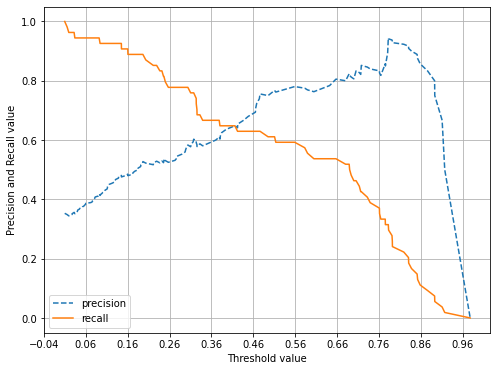

In [ ]:
pred_proba_c1 = lr_clf.predict_proba(X_test)[:,1]
precisions, recalls, thresholds = precision_recall_curve(y_test, pred_proba_c1)

plt.figure(figsize = (8,6))
threshold_boundary = thresholds.shape[0]
plt.plot(thresholds, precisions[:threshold_boundary], linestyle = '--', label = 'precision')
plt.plot(thresholds, recalls[:threshold_boundary], label = 'recall')

start, end = plt.xlim()
plt.xticks(np.round(np.arange(start, end, 0.1),2))

plt.xlabel('Threshold value'); plt.ylabel('Precision and Recall value')
plt.legend(); plt.grid()
plt.show()

# precision_recall_curve를 보면 threshold가 0.42 정도에서 precision과 recall이 균형을 이루지만 그 값이 0.7이하로 매우 낮다

In [ ]:
diabetes_data.describe() #DF의 기본 통계량
# 값이 0인 항목이 굉장히 많다

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


(array([  5.,   0.,   4.,  32., 156., 211., 163.,  95.,  56.,  46.]),
 array([  0. ,  19.9,  39.8,  59.7,  79.6,  99.5, 119.4, 139.3, 159.2,
        179.1, 199. ]),
 <a list of 10 Patch objects>)

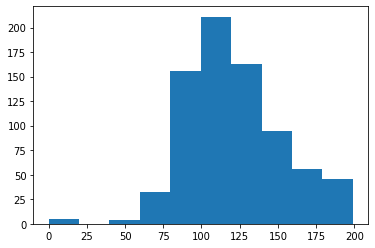

In [ ]:
plt.hist(diabetes_data['Glucose'], bins = 10)

In [ ]:
# 0값을 검사할 feature 명 리스트
zero_features = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI'] # Pregnancies는 출산횟수이므로 0이 나올 수 있음

# 전체 데이터 건수
total_count = diabetes_data['Glucose'].count()

# feature 별로 반복하면서 데이터 값이 0인 데이터 건수를 출력하고, 퍼센트 계산
for feature in zero_features:
  zero_count = diabetes_data[diabetes_data[feature] == 0][feature].count()
  print('{0} 0 건수는 {1}, 퍼센트는 {2:.2f}%'.format(feature, zero_count, 100*zero_count/total_count))

# Insulin과 SkunThickness feature는 각각 0의 값이 전체의 29%, 48%로 상당히 많다.
# 전체 데이터 개수가 768개로 많지 않기 때문에 0값 각각을 중앙값으로 대체한다

Glucose 0 건수는 5, 퍼센트는 0.65%
BloodPressure 0 건수는 35, 퍼센트는 4.56%
SkinThickness 0 건수는 227, 퍼센트는 29.56%
Insulin 0 건수는 374, 퍼센트는 48.70%
BMI 0 건수는 11, 퍼센트는 1.43%


In [ ]:
# zero_features 리스트 내부에 저장된 개별 feature들에 대해서 0값을 평균 값으로 대체
mean_zero_features = diabetes_data[zero_features].mean()
diabetes_data[zero_features] = diabetes_data[zero_features].replace(0,mean_zero_features) 
# replace에서 list 값을 제공하면 순서에 맞춰 값을 채워넣는다

In [ ]:
X = diabetes_data.iloc[:,:-1]
y = diabetes_data.iloc[:,-1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 156, stratify = y)

# StandardScaler 클래스를 이용해 feature dataset에 일괄적으로 스케일링 적용
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 로지스틱회귀를 학습/평가
lr_clf = LogisticRegression(max_iter = 500)
lr_clf.fit(X_train, y_train)
pred = lr_clf.predict(X_test)
print("오차행렬:\n",confusion_matrix(y_test, pred))
print("정확도 accuracy:{0:.4f}".format(accuracy_score(y_test,pred)))
print("정밀도 precision:{0:.4f}".format(precision_score(y_test,pred)))
print("재현율 recall:{0:.4f}".format(recall_score(y_test,pred)))
print("F1 score:{0:.4f}".format(f1_score(y_test,pred)))
print("AUC score:{0:.4f}".format(roc_auc_score(y_test,pred)))

오차행렬:
 [[90 10]
 [21 33]]
정확도 accuracy:0.7987
정밀도 precision:0.7674
재현율 recall:0.6111
F1 score:0.6804
AUC score:0.7556


In [ ]:
from sklearn.preprocessing import Binarizer

# thresholds값의 변화에 따라 평가값의 변화 살펴보기
thresholds = [0.3,0.33,0.36,0.39,0.42,0.45,0.48,0.50]
pred_proba = lr_clf.predict_proba(X_test)
pred_proba_c1 = pred_proba[:,1]
eval = []
for custom_threshold in thresholds:
  binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_c1.reshape(-1,1))
  custom_predict = binarizer.transform(pred_proba_c1.reshape(-1,1))
  eval.append([accuracy_score(y_test,custom_predict),precision_score(y_test,custom_predict),
               recall_score(y_test,custom_predict),f1_score(y_test,custom_predict),roc_auc_score(y_test,custom_predict)])

df = pd.DataFrame(eval, index = thresholds , columns = ['accuracy','precision','recall','f1_score','roc_auc_score'])
df

# threshold = 0.48이 가장 적절해보인다

,accuracy,precision,recall,f1_score,roc_auc_score
0.30,0.714286,0.565789,0.796296,0.661538,0.733148
0.33,0.740260,0.600000,0.777778,0.677419,0.748889
0.36,0.746753,0.619048,0.722222,0.666667,0.741111
0.39,0.753247,0.633333,0.703704,0.666667,0.741852
0.42,0.779221,0.692308,0.666667,0.679245,0.753333
0.45,0.785714,0.705882,0.666667,0.685714,0.758333
0.48,0.798701,0.744681,0.648148,0.693069,0.764074
0.50,0.798701,0.767442,0.611111,0.680412,0.755556


In [ ]:
# threshold를 0.48로 설정한 Binarizer 생성
binarizer = Binarizer(threshold = 0.48)

pred_th_048 = binarizer.fit_transform(pred_proba[:,1].reshape(-1,1))


print("오차행렬:\n",confusion_matrix(y_test, pred_th_048))
print("정확도 accuracy:{0:.4f}".format(accuracy_score(y_test,pred_th_048)))
print("정밀도 precision:{0:.4f}".format(precision_score(y_test,pred_th_048)))
print("재현율 recall:{0:.4f}".format(recall_score(y_test,pred_th_048)))
print("F1 score:{0:.4f}".format(f1_score(y_test,pred_th_048)))
print("AUC score:{0:.4f}".format(roc_auc_score(y_test,pred_th_048)))

## binarizer.fit_transform()는 2D array만 받으므로 reshape를 통해 2D array로 바꿔주어야한다.
## y_test.shape  = (154,)이므로, pred_proba[:,1]도 .reshape(-1,1)를 하여 열벡터를 맞춰주어야 평가메서드를 사용할 수 있다

'\nprint("오차행렬:\n",confusion_matrix(y_test, pred_th_048))\nprint("정확도 accuracy:{0:.4f}".format(accuracy_score(y_test,pred_th_048)))\nprint("정밀도 precision:{0:.4f}".format(precision_score(y_test,pred_th_048)))\nprint("재현율 recall:{0:.4f}".format(recall_score(y_test,pred_th_048)))\nprint("F1 score:{0:.4f}".format(f1_score(y_test,pred_th_048)))\nprint("AUC score:{0:.4f}".format(roc_auc_score(y_test,pred_th_048)))\n'

## 1-3. 사이킷런 예제(mnist, 이진분류, 다중분류 평가)

In [1]:
# mnist 데이터 내려받기
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1)
mnist.keys() 

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [3]:
mnist.get('DESCR') # mnist 설명

"**Author**: Yann LeCun, Corinna Cortes, Christopher J.C. Burges  \n**Source**: [MNIST Website](http://yann.lecun.com/exdb/mnist/) - Date unknown  \n**Please cite**:  \n\nThe MNIST database of handwritten digits with 784 features, raw data available at: http://yann.lecun.com/exdb/mnist/. It can be split in a training set of the first 60,000 examples, and a test set of 10,000 examples  \n\nIt is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting. The original black and white (bilevel) images from NIST were size normalized to fit in a 20x20 pixel box while preserving their aspect ratio. The resulting images contain grey levels as a result of the anti-aliasing technique used by the normalization algorithm. the images were centered in a 28x28 

In [4]:
X, y = mnist['data'], mnist['target']
print('X.shape: ',X.shape) # 데이터의 크기
print('X type: ', type(X)) # 데이터의 타입
print('X info: ', X.info()) # 데이터의 정보
print()
print('y.shape: ',y.shape) # 레이블의 크기 
print('y type: ', type(y)) # 데이터의 타입
print('y info: ', y.describe()) # 레이블의 정보

# 784개의 특성(28*28 image), 70000개의 샘플, 이미지 샘플이므로 각각의 픽셀은 0~255의 값을 가진다.

X.shape:  (70000, 784)
X type:  <class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Columns: 784 entries, pixel1 to pixel784
dtypes: float64(784)
memory usage: 418.7 MB
X info:  None

y.shape:  (70000,)
y type:  <class 'pandas.core.series.Series'>
y info:  count     70000
unique       10
top           1
freq       7877
Name: class, dtype: object


In [5]:
X

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
y # 레이블의 데이터 타입 == object, 숫자로 바꿔주어야함

0        5
1        0
2        4
3        1
4        9
        ..
69995    2
69996    3
69997    4
69998    5
69999    6
Name: class, Length: 70000, dtype: category
Categories (10, object): ['0', '1', '2', '3', ..., '6', '7', '8', '9']

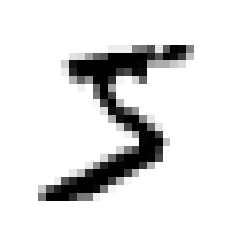

0번째 샘플의 레이블값:  5


In [7]:
# 샘플 하나의 이미지 출력

import matplotlib as mpl
import matplotlib.pyplot as plt

some_digit = X.iloc[0,:].values # 첫번째 샘플
some_digit_image = some_digit.reshape(28,28) # 28*28 이미지로 reshape, reshape는 ndarray의 메서드

plt.imshow(some_digit_image, cmap = 'binary')
plt.axis("off")
plt.show()
print('0번째 샘플의 레이블값: ',y[0])

In [8]:
# 레이블의 데이터 타입을 숫자로 바꾸기
y = y.astype(np.uint8)

In [9]:
# 훈련 / 평가 데이터 나누기
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [10]:
# 이진 분류기 훈련, 5인지 아닌지 판단

y_train_5 = (y_train == 5) # label이 5면 True, 5가 아니면 False인 bool series
y_test_5 = (y_test == 5)

In [11]:
# 확률적 경사 하강법으로 이진분류기 훈련
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state = 42)
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(random_state=42)

In [12]:
# accuracy score로 SGDClassifier 평가하기
from sklearn.metrics import accuracy_score
pred = sgd_clf.predict(X_test)

print("accuaracy: ", accuracy_score(y_test_5,pred))

accuaracy:  0.9492


In [13]:
# stratifiedKFold로 교차 검증하기
# 이진분류에서 

from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

skfolds = StratifiedKFold(n_splits = 3, random_state = 42, shuffle = True)

for train_index, test_index in skfolds.split(X_train, y_train_5):
  clone_clf  = clone(sgd_clf)
  X_train_folds = X_train.iloc[train_index]
  y_train_folds = y_train_5[train_index]
  X_test_fold = X_train.iloc[test_index]
  y_test_fold = y_train_5[test_index]

  clone_clf.fit(X_train_folds, y_train_folds)
  y_pred = clone_clf.predict(X_test_fold)
  print("accuaracy: ", accuracy_score(y_test_fold,y_pred))

accuaracy:  0.9669
accuaracy:  0.91625
accuaracy:  0.96785


In [14]:
# cross_val_score를 사용해서 교차검증
from sklearn.model_selection import cross_val_score
score = cross_val_score(sgd_clf, X_train, y_train_5, cv = 3, scoring='accuracy')
score

array([0.95035, 0.96035, 0.9604 ])

In [15]:
# 모든 이미지를 5가 아님 == false로 예측하는 더미 분류기로 예측
from sklearn.base import BaseEstimator

class Never5Classifier(BaseEstimator):
  def fit(self, X, y = None):
    return self
  def predict(self, X):
    return np.zeros((len(X),1), dtype = bool)

never_5_clf = Never5Classifier()
score = cross_val_score(never_5_clf, X_train, y_train_5, cv = 3, scoring = "accuracy")
score

## 불균형한 데이터셋이기 때문에 그냥 모든걸 false로 예측하는 모델도 90% 이상의 정확도를 가진다.

array([0.91125, 0.90855, 0.90915])

In [20]:
# cv 예측기
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd_clf,X_train, y_train_5, cv = 3)
#오차 행렬
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train_5,y_train_pred)

array([[53892,   687],
       [ 1891,  3530]])

In [22]:
# 정밀도 재현율 f1 score
from sklearn.metrics import precision_score, recall_score, f1_score
print("precision_score: ",precision_score(y_train_5, y_train_pred))
print("recall_score: ",recall_score(y_train_5, y_train_pred))
print("f1_score", f1_score(y_train_5, y_train_pred))

precision_score:  0.8370879772350012
recall_score:  0.6511713705958311
f1_score 0.7325171197343846


In [24]:
# threshold를 내리면 recall 값이 높아지고, precision이 낮아진다
# threshold를 높이면 recall 값이 낮아지고, precision이 높아진다
# method = decision_function
# sgdClassifier에는 predict_proba가 없다

y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv = 3, method = "decision_function")


from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)
## precision_recall_curve return:
# precision: ndarray of shape (n_thresholds + 1,), recall: ndarray of shape (n_thresholds + 1,), threshold: sndarray of shape (n_thresholds,)
# precision[0] = 0, precision[-1] = 1, recal[0] = 1, recall[-1] = 0

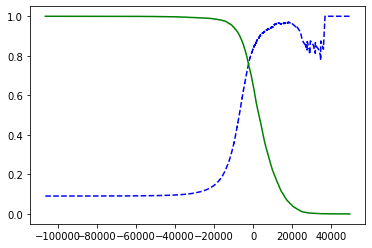

In [35]:
# threshold에 따른 recall, precision 값
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
  plt.plot(thresholds, precisions[:-1], "b--", label ="정밀도")
  plt.plot(thresholds, recalls[1:], "g-", label = "재현율")
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.show()

# recall은 threshold가 올라감에 따라 무조건 줄어들 수 밖에 없지만,
# precision은 thresholds가 올라가도 가끔 낮아질 때가 있다.

In [37]:
# ap score, precision_recall 그래프에서 그래프 선 아래쪽의 면적을 계산하는 방법
from sklearn.metrics import average_precision_score

print(average_precision_score(y_train_5,y_scores))

0.810041762752646


In [43]:
threshold_90_precision = thresholds[np.argmax(precisions >= 0.90)] # threshold 값: 3370.019499143958
y_train_pred_90 = (y_scores >= threshold_90_precision)
print("precision_score: ", precision_score(y_train_5, y_train_pred_90))
print("recall_score: ", recall_score(y_train_5, y_train_pred_90))

# precision이 90을 찍음

precision_score:  0.9000345901072293
recall_score:  0.4799852425751706


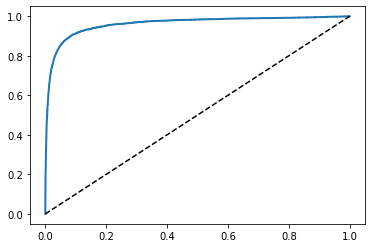

In [45]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds  = roc_curve(y_train_5, y_scores)

def plot_roc_curve(fpr, tpr, label = None):
  plt.plot(fpr, tpr, linewidth = 2, label = label)
  plt.plot([0,1],[0,1], 'k--')

plot_roc_curve(fpr, tpr)
plt.show()

# roc_curve x 축: fpr (실제 class 0중에 못 맞춘 비율)
# roc_curve y 축: tpr (실제 class 1중에 맞춘 비율)

In [46]:
# auc 값, roc_curve 곡선 아래 면적
from sklearn.metrics import roc_auc_score
roc_auc_score(y_train_5, y_scores)

0.9604938554008616

ROC curve vs PR(정밀도/재현율) 곡선:   
양성 클래스가 드물거나 거짓 음성(negative로 예측했는데 실제로는 positive인 것)보다 거짓 양성(positive로 예측했는데 실제로는 negative인 것)이 더 중요할때 PR 곡선을 사용한다

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47004 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 45924 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54252 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47112 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49828 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 53944 missing from current font.
  font.set_

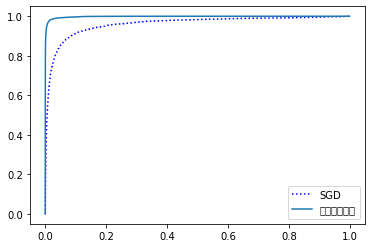

In [48]:
# RandomForestClassifier로 예측 / 평가
from sklearn.ensemble import RandomForestClassifier
# RandomForestClassifier에는 decisionfunction이 없고, predict_proba가 있다.

forest_clf = RandomForestClassifier(random_state = 42)
y_probas_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv = 3, method = "predict_proba")

# roc curve
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train_5, y_probas_forest[:,1]) # 양성일 확률[:,1] 사용

plt.plot(fpr, tpr, "b:", label = "SGD") # sgd roc_curve
plt.plot(fpr_forest, tpr_forest, label = "랜덤포레스트") # random forest roc_curve
plt.legend(loc = "lower right")
plt.show()

In [49]:
# random forest auc
roc_auc_score(y_train_5, y_probas_forest[:,1])

0.9983436731328145

다중 분류기(multi-class classifier): 둘 이상의 클래스를 구별하는 분류기   
이진 분류기(binary classifier): 두개의 클래스를 구별하는 분류기   

이진 분류기로 다중 분류기 만들기
 - OvR(One-versus-the-rest): 이미지를 분류 할 때 각 분류기의 결정점수중에서 가장 높은 것을 클래스로 선택    
 (ex. 0 or not 이진 분류기 vs ... vs 9 or not 이진 분류기 )
 - OvO(One-versus_One): 각 숫자의 조합마다 이진 분류기를 훈련, 가장 많이 양성으로 분류된 클래스 선택   
 (ex. 1 or 2, 1 or 3, ... ,8 vs 9)


In [77]:
# svc(support vector classifier)로 다중 예측 / 평가
from sklearn.svm import SVC
svm_clf = SVC()
svm_clf.fit(X_train, y_train)
print("예측: ",svm_clf.predict(X_test.iloc[0,:].values.reshape(1,-1)), "실제 값: ", y_test.iloc[0])
print("decision_function: \n", svm_clf.decision_function(X_test.iloc[0,:].values.reshape(1,-1)))
# SVC는 decision_function의 개수가 10개이므로 OvO를 사용하여서 학습하였음

예측:  [7] 실제 값:  7
decision_function: 
 [[ 3.80895496 -0.30212376  6.19343167  8.29375992  1.71167996  4.76436748
   0.69153837  9.31783975  2.75699419  7.28292338]]


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  "X does not have valid feature names, but"


In [78]:
# OneVsRestClassifier
from sklearn.multiclass import OneVsRestClassifier
ovr_clf = OneVsRestClassifier(SVC())
ovr_clf.fit(X_train, y_train)
print("예측: ",ovr_clf.predict(X_test.iloc[0,:].values.reshape(1,-1)), "실제 값: ", y_test.iloc[0])

KeyboardInterrupt: ignored

In [79]:
# SGDClassifier로 다중 분류하기
cross_val_score(sgd_clf, X_train, y_train, cv = 3, scoring = "accuracy")


array([0.87365, 0.85835, 0.8689 ])

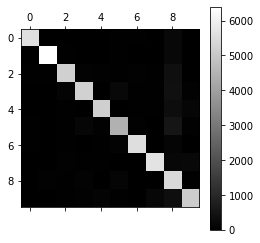

In [80]:
# 입력 스케일 조정
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))

# 스케일 조정한 데이터 값으로 다중 분류, SGDClassifier
y_train_pred = cross_val_predict(sgd_clf,X_train_scaled, y_train, cv = 3)
conf_mx = confusion_matrix(y_train, y_train_pred) # 혼동행렬
plt.matshow(conf_mx, cmap = plt.cm.gray) # 혼동행렬 시각화
plt.colorbar()
plt.show()


다중분류에서의 혼동행렬: https://ai-creator.tistory.com/579   
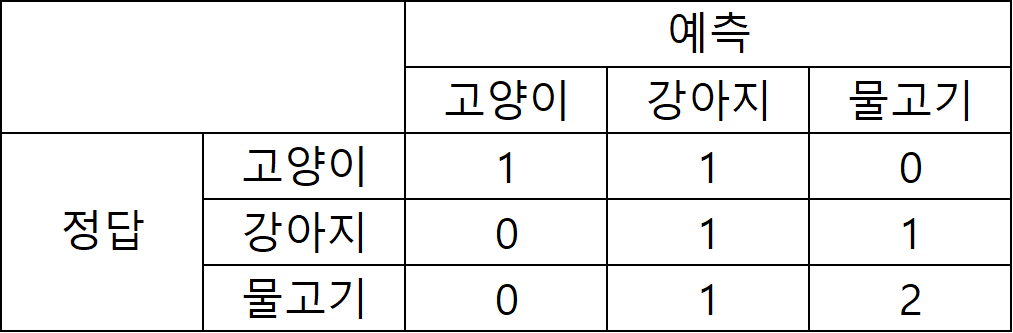

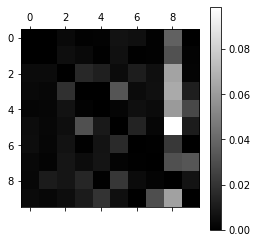

In [82]:
# 혼동행렬 오류값에 집중해서 보기
row_sums = conf_mx.sum(axis = 1, keepdims=True) # 각 레이블에 해당하는 개수 구하기
norm_conf_mx = conf_mx / row_sums # 전체 값을 나눠서 오류 비율 구하기
np.fill_diagonal(norm_conf_mx,0) # 대각값(잘 분류된 값) 0으로 바꾸기, 오류값 더 잘 보이도록
plt.matshow(norm_conf_mx, cmap=plt.cm.gray)
plt.colorbar()
plt.show()

# 8로 잘못 예측되는 값들이 많이 생긴다

In [84]:
# 다중 레이블 분류
from sklearn.neighbors import KNeighborsClassifier

y_train_large = (y_train >= 7)
y_train_odd = (y_train % 2 == 1)
y_multilabel = np.c_[y_train_large, y_train_odd] # 배열 세로로 붙이기

knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_multilabel) # 다중 레이블 분류
#평가
y_train_knn_pred = cross_val_predict(knn_clf,X_train,y_multilabel, cv = 3)
f1_score(y_multilabel, y_train_knn_pred, average = "macro") # macro: 가중치가 적용되지 않은 평균

0.976410265560605

In [88]:
# 다중 출력 다중 레이블 분류

# 노이즈 낀 이미지 생성
noise = np.random.randint(0,100,(len(X_train),784))
X_train_mod = X_train + noise
noise = np.random.randint(0,100,(len(X_test),784))
X_test_mod = X_test + noise
y_train_mod = X_train
y_test_mod = X_test

# knn 훈련
knn_clf.fit(X_train_mod, y_train_mod)

KNeighborsClassifier()

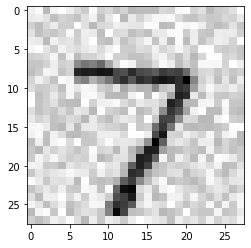

In [96]:
# 노이즈 낀 이미지
plt.imshow(X_test_mod.iloc[0].values.reshape(28,28), cmap = 'binary')
plt.show()

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"


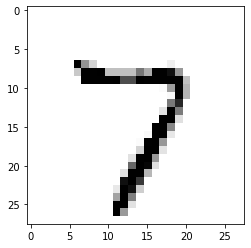

In [100]:
# knn 출력 / 노이즈 제거 이미지
clean_digit = knn_clf.predict([X_test_mod.iloc[0].values])
plt.imshow(clean_digit.reshape(28,28), cmap = 'binary')
plt.show()

# 분류(classification) - 로지스틱 회귀

## 2-1. 퍼셉트론 to 로지스틱 회귀

뉴런의 작동방식:   
초기 머신러닝에서는 뉴런을 모방하여 머신러닝을 구현하려고 노력했다. 뉴런은 수상 돌기에 여러 신호가 도착하면 세포체에 합쳐지고 합처진 신호가 특정 임계값을 넘으면 출력신호가 생성되고 축삭 돌기를 이용하여 전달된다.

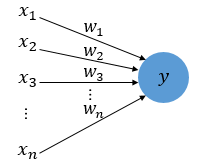   
단층 퍼셉트론(Single-layer Perceptron):    
$x$는 입력 값을 나타내며, $w$는 가중치, $y$는 출력값이다. 각각의 입력값에는 각각의 가중치가 존재하는데, 이때 가중치의 값이 크면 클수록 해당 입력값이 중요하다는 것을 의미한다. 각 입력값이 가중치에 곱해져서(선형 함수) 인공 뉴련에 보내지고 그 값이 임계치를 넘으면 인공 뉴런은 1을 출력하고 그렇지 않으면 0을 출력한다.

$$if\; \sum_{i}^{n}x_iw_i\;\geq \; \theta (threshold) \to y = 1 \\
if\; \sum_{i}^{n}x_iw_i\;<  \; \theta (threshold) \to y = 0  $$

주로 threshhold는 좌변으로 넘겨져 bias로 표현된다
$$if\; \sum_{i}^{n}x_iw_i + b\;\geq \; 0) \to y = 1 \\
if\; \sum_{i}^{n}x_iw_i + b\;<  \; 0 \to y = 0  $$



단층 퍼셉트론의 한계:   
single-layer perceptron은 AND, OR, NAND 등 여러 논리 회로를 표현할 수 있지만, XOR gate의 논리구조는 표현할 수 없다.(하나의 직선으로는 XOR을 표현할 수 없다.) -> 인공지능의 겨울   
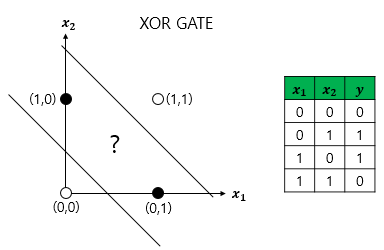

In [95]:
# perceptron과 AND gate
# AND gate
# x1 x2 y
# 0 0 0
# 0 1 0
# 1 0 0
# 1 1 1

def AND_gate(x1, x2):
  w1 = 0.5
  w2 = 0.5
  b = -0.7
  result = x1*w1 + x2*w2 +b
  if result <= 0:
    return 0
  else:
    return 1

print(AND_gate(0, 0), AND_gate(0, 1), AND_gate(1, 0), AND_gate(1, 1))

0 0 0 1


퍼셉트론의 학습 방법:   
가중치와 입력값을 곱해서 더한 결과값이 목표값과 오차가 얼마나 되는 지 계산한 후 이 오차를 줄이기 위해 모든 가중치값을 학습률 $\eta $에 비례하여 동시에 변화시킨다
$$\\
w_j:=w_j+\Delta w_j\\
\Delta w_j = \eta(y^{(i)}-\hat{y}^{(i)})x^{(i)}_j$$


In [146]:
# 퍼셉트론 알고리즘 구현
class perceptron(object):
  # 퍼셉트론 분류기
  # 매개변수:
  # eta: float, 학습률 (0.0~1.0)
  # n_iter: in,t 훈현 데이터셋 반복 횟수
  # random_state: int, 가중치 무작위 초기화를 위한 난수 생성기 시드
  # 속성:
  # w_: 1d-array, 학습된 가중치
  # errors_: list, 에포크마다 누적된 분류 오류

  def __init__(self, eta=0.01, n_iter = 50, random_state = 1):
    self.eta = eta
    self.n_iter = n_iter
    self.random_state = random_state

  def fit(self, X, y):
    # 훈련 데이터 학습
    # 매개변수:
    # X: {array-like}, shape = [n_samples, n_features]
    # n 개의 샘플과 n_features개의 특성으로 이루어진 훈련데이터
    # y: array-like, shape = [n_samples], 타깃값
    # 반환값:
    # self: object

    rgen = np.random.RandomState(self.random_state) # 난수 생성 클래스
    self.w_ = rgen.normal(loc = 0.0, scale = 0.01, size = 1+ X.shape[1]) # size 크기의 평균이 0이고, 표준편차가 0.01인 랜덤배열 생성

    self.errors_ = []

    for _ in range(self.n_iter):
      errors = 0
      for xi, target in zip(X,y):
        update = self.eta * (target - self.predict(xi)) # 예측값이 맞으면 그대로, 예측값이 틀리면 target 방향으로 update
        self.w_[1:] += update * xi # 가중치
        self.w_[0] += update # bias
        errors += int(update != 0.0)
      self.errors_.append(errors)
    return self

  def net_input(self, X):
    # 최종 입력 계산
    return np.dot(X, self.w_[1:]) + self.w_[0] # 선형함수로 가중치와 입력값 dot product

  def predict(self, X):
    # 단위 계단 함수를 사용하여 클래스 레이블 반환
    return np.where(self.net_input(X) >= 0.0 , 1 ,-1) # np.where(condition, T, F)

In [106]:
# 붓꽃 데이터에서 퍼셉트론 훈련
from sklearn.datasets import load_iris
iris = load_iris()
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [126]:
df = pd.DataFrame(np.concatenate([iris['data'],iris['target'].reshape(-1,1)], axis = 1))
df.tail()

,0,1,2,3,4
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0
149,5.9,3.0,5.1,1.8,2.0


In [139]:
# 필요업슨 레이블 버리고, X, y 데이터 나누기

df.drop(index = df[df.loc[:,4] == 2.0].index, inplace = True)
y = np.where(df.iloc[:,4].values == 1.0,-1,1)
X = df.iloc[:,[0,2]].values

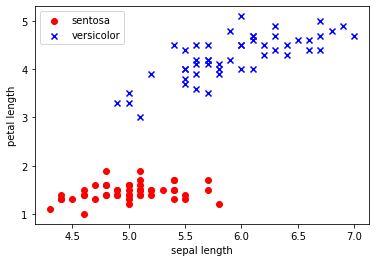

In [140]:
# 산점도 그리기
plt.scatter(X[:50,0], X[:50,1], color = 'red', marker = 'o', label = 'sentosa')
plt.scatter(X[50:100,0], X[50:100,1], color = 'blue', marker = 'x', label = 'versicolor')
plt.xlabel('sepal length')
plt.ylabel('petal length')
plt.legend(loc = 'upper left')
plt.show()

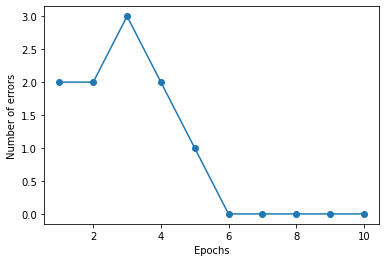

In [148]:
ppn = perceptron(eta = 0.1, n_iter = 10) # 학습률 0.1, 반복횟수 :10
ppn.fit(X,y) # 퍼셉트론 훈련
plt.plot(range(1,len(ppn.errors_)+1), ppn.errors_, marker = 'o')
plt.xlabel('Epochs')
plt.ylabel('Number of errors')
plt.show()

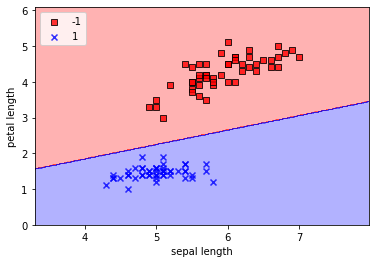

In [152]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt


def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):

    # 마커와 컬러맵을 설정합니다.
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # 결정 경계를 그립니다.
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1 # x1 feature의 최소/최대값
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1 # x2 feature의 최소/최대값
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution)) # x1, x2 범위 안에서 격자 그리드 만들기 
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T) # 각 grid를 예측하기
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap) # 등치선(동일한 높이값을 가지는 인접한 지점을 연속적으로 이어 구성한) 그리기
                                                    # contourf([X, Y,] Z(높이), [levels], **kwargs)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    #샘플의 산점도
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    c=colors[idx],
                    marker=markers[idx], 
                    label=cl, 
                    edgecolor='black')

plot_decision_regions(X,y,classifier = ppn)
plt.xlabel("sepal length")
plt.ylabel("petal length")
plt.legend(loc = 'upper left')
plt.show()